# Project 1: SAT & ACT Analysis

This is the first project done as part of the General Assembly's Data Science Immersive in May 2021.

## Problem Statement

The data provided contains the SAT and ACT standardization test scores & participation rates for each state in the United States from 2017 & 2018. The goal is to make a recommendation to the College Board (the administer of SAT), based on our analysis of the data, to improve the participation rates in certain states of interest.

## Executive Summary

In this project, we work with data containing the test scores and participation rates for the two standardization tests, SAT & ACT, conducted in the US and mandated by many universities and colleges as part of their admission requirements. The datasets provided had state-wise mean values for the following features-
- SAT datasets: State, Participation Rate, Math & Evidence-Based Reading and Writing, and Total scores.
- ACT datasets: State, Participation Rate, Math, Science, Reading, English, and Composite scores.

After importing all the data into the code, an initial visual inspection revealed that the data was complete and that there were no null values. Each dataset had all the states' info and thus a comparison study can be done to understand certain trends. However, there were some anomalies with the datatypes which were addressed along the way. After cleaning and verifying, all datasets were merged into a single file to perform 
Exploratory Data Analysis (EDA) as well as plot the trends.

Frequentist inferences were drawn from the datasets to look for any underlying relationships between the participation rates and states. There were a few interesting observations that are analysed for reasoning. An interesting highlight was the _uncanny_ resemblence of states' political alignment and it's preference for SAT/ACT. Finally, the conclusions and recommendations were listed at the end.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import & Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**All libraries used should be added here**

In [1]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# Plot settings
%matplotlib inline
sns.set_style("whitegrid")

# Implented plot text sizes from- https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Read the SAT & ACT 2017 data from csv to dataframes
sat_2017_df = pd.read_csv('../data/sat_2017.csv')
act_2017_df = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat_2017_df.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The two datasets contain the 2017 SAT & ACT test scores along with participation rates.

The _sat_2017_df_ dataframe stores the Evidence-Based Reading and Writing, Math, and the Total scores in the respective columns. It also has Participation data for all the 50 States of the US and District of Columbia. This data is for 2017 SAT.

The _act_2017_df_ dataframe stores the English, Math, Reading, Science, and Composite scores in the respective columns. It also has Participation data for all the 50 States of the US, District of Columbia, and the National average. This data is for 2017 ACT.

#### 4a. Does the data look complete? 

Answer: When performed the `.info()` method of the pandas DataFrame on the two datasets, we see that both of them have all non-null values, i.e., the data looks complete at first glance.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

#### SAT

In [6]:
# minimum and maximum values SAT
print("Minimum values per category for SAT 2017:\n")
print(sat_2017_df.min())
print('\n\n')

print("Maximum values per category for SAT 2017:\n")
print(sat_2017_df.max())
print('\n\n')

print("Average values per category for SAT 2017:\n")
print(sat_2017_df.mean())

Minimum values per category for SAT 2017:

State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object



Maximum values per category for SAT 2017:

State                                 Wyoming
Participation                             96%
Evidence-Based Reading and Writing        644
Math                                      651
Total                                    1295
dtype: object



Average values per category for SAT 2017:

Evidence-Based Reading and Writing     569.117647
Math                                   547.627451
Total                                 1126.098039
dtype: float64


By comparing with the [reference](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/) for SAT 2017, the lowest possible score for an individual part of the SAT is 200, but for some reason, the minimum score for Math is 52 in the data. Secondaly, it seems the maximum participation in some states is 100%, but the maximum displayed above is only 96%. It could be due to the data types and needs cleaning. The average across the states seems to be in a reasonable range of the reference.

#### ACT

In [7]:
# minimum and maximum values ACT
print("Minimum values per category for ACT 2017:\n")
print(act_2017_df.min())
print('\n\n')

print("Maximum values per category for ACT 2017:\n")
print(act_2017_df.max())
print('\n\n')

print("Average values per category for ACT 2017:\n")
print(act_2017_df.mean())

Minimum values per category for ACT 2017:

State            Alabama
Participation        60%
English             16.3
Math                  18
Reading             18.1
Science              2.3
Composite           17.8
dtype: object



Maximum values per category for ACT 2017:

State            Wyoming
Participation        98%
English             25.5
Math                25.3
Reading               26
Science             24.9
Composite           25.5
dtype: object



Average values per category for ACT 2017:

English    20.919231
Math       21.173077
Reading    22.001923
Science    21.040385
dtype: float64


By comparing with the [reference](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf) for ACT 2017, the minimum and maximum participation numbers are ambiguous, as they would be as low as 8% and as high as 100%. Again, this could be due to the data type and needs to be looked into. The mean values match with the national average from the reference, except it did not calculate the mean for Composite column, which is odd as it should be a numerical data. The minimum Science value is 2.3, which is unsually low.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [8]:
# find the minimum score of 52 in Math for SAT 2017
sat_2017_df[sat_2017_df['Math'] == 52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


The average Math score for SAT 2017 in the state of Maryland is 524 ([refrence](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)) instead of 52. So, fix the error.

In [9]:
# SAT 2017: change Math score 52 -> 524
sat_2017_df.loc[sat_2017_df['Math'] == 52,'Math'] = 524

In [10]:
# find the minimum score of 2.3 in Science for ACT 2017
act_2017_df[act_2017_df['Science'] == 2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


The average Science score for ACT 2017 in the state of Maryland is 23.2 ([reference](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)) instead of 2.3. So, fix the error.

In [11]:
# ACT 2017: change Science score 2.3 -> 23.2
act_2017_df.loc[act_2017_df['Science'] == 2.3,'Science'] = 23.2

In [12]:
# After running the command in step6 to convert composite to float, found a bad value
# find the bad value in Composite score of ACT 2017
act_2017_df[act_2017_df['Composite'] == '20.2x']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [13]:
# ACT 2017: change Composite score 20.2x -> 20.2
act_2017_df.loc[act_2017_df['Composite'] == '20.2x','Composite'] = '20.2'

From the same reference as last step, the erroneous composite value in ACT 2017 data is corrected.

#### 5. What are your data types? 
Display the data types of each feature. 

In [14]:
# SAT data types
sat_2017_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [15]:
# ACT data types
act_2017_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Participation (in %) for both the DataFrames is an `object` but should be a `float` or `int` rather. As confirmed here and mentioned above, the data type for Composite in the ACT 2017 dataset is `object` but should be `float` as well.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [16]:
# fix the column data types
sat_2017_df['Participation'] = sat_2017_df['Participation'].apply(lambda x: int(x.replace('%','')))
act_2017_df['Participation'] = act_2017_df['Participation'].apply(lambda x: int(x.replace('%','')))
act_2017_df['Composite'] = act_2017_df['Composite'].apply(lambda x: float(x))

- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [17]:
sat_2017_df.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [18]:
act_2017_df.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

Just check the min, max values again to see the effect of the modifications made above

In [19]:
# minimum and maximum values SAT
print("Minimum values per category for SAT 2017:\n")
print(sat_2017_df.min())
print('\n\n')

print("Maximum values per category for SAT 2017:\n")
print(sat_2017_df.max())
print('\n\n')

print("Average values per category for SAT 2017:\n")
print(sat_2017_df.mean())

Minimum values per category for SAT 2017:

State                                 Alabama
Participation                               2
Evidence-Based Reading and Writing        482
Math                                      468
Total                                     950
dtype: object



Maximum values per category for SAT 2017:

State                                 Wyoming
Participation                             100
Evidence-Based Reading and Writing        644
Math                                      651
Total                                    1295
dtype: object



Average values per category for SAT 2017:

Participation                           39.803922
Evidence-Based Reading and Writing     569.117647
Math                                   556.882353
Total                                 1126.098039
dtype: float64


In [20]:
# minimum and maximum values ACT
print("Minimum values per category for ACT 2017:\n")
print(act_2017_df.min())
print('\n\n')

print("Maximum values per category for ACT 2017:\n")
print(act_2017_df.max())
print('\n\n')

print("Average values per category for ACT 2017:\n")
print(act_2017_df.mean())

Minimum values per category for ACT 2017:

State            Alabama
Participation          8
English             16.3
Math                  18
Reading             18.1
Science             18.2
Composite           17.8
dtype: object



Maximum values per category for ACT 2017:

State            Wyoming
Participation        100
English             25.5
Math                25.3
Reading               26
Science             24.9
Composite           25.5
dtype: object



Average values per category for ACT 2017:

Participation    65.153846
English          20.919231
Math             21.173077
Reading          22.001923
Science          21.442308
Composite        21.509615
dtype: float64


Looks good, so let's proceed!

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference between the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
# Rename SAT 2017 DataFrame columns
sat_2017_df.rename(columns={
    'State': 'state',
    'Participation': 'sat_2017_participation',
    'Evidence-Based Reading and Writing': 'sat_2017_ebrw',
    'Math': 'sat_2017_math',
    'Total': 'sat_2017_total'
}, inplace=True)

In [22]:
# Rename ACT 2017 DataFrame columns
act_2017_df.rename(columns={
    'State': 'state',
    'Participation': 'act_2017_participation',
    'English': 'act_2017_english',
    'Math': 'act_2017_math',
    'Science': 'act_2017_science',
    'Reading': 'act_2017_reading',
    'Composite': 'act_2017_composite'
}, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|_object_|2017 ACT/SAT|All the 50 states of the US and District of Columbia|
|sat_2017_participation|_int_|2017 SAT|Participation percentage for SAT 2017|
|sat_2017_ebrw|_int_|2017 SAT|Average Evidence-Based Reading and Writing score for SAT 2017 (between 200~800)|
|sat_2017_math|_int_|2017 SAT|Average Math score for SAT 2017 (between 200~800)|
|sat_2017_total|_int_|2017 SAT|Average Total score for SAT 2017 (between 400~1600)|
|act_2017_participation|_int_|2017 ACT|Participation percentage for ACT 2017|
|act_2017_english|_float_|2017 ACT|Average English score for ACT 2017 (between 1~36)|
|act_2017_math|_float_|2017 ACT|Average Math score for ACT 2017 (between 1~36)|
|act_2017_science|_float_|2017 ACT|Average Science score for ACT 2017 (between 1~36)|
|act_2017_reading|_float_|2017 ACT|Average Reading score for ACT 2017 (between 1~36)|
|act_2017_composite|_float_|2017 ACT|Average Composite score for ACT 2017 (between 1~36)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [23]:
act_2017_df['state'].unique()

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [24]:
# ACT has a record for National values, which is redundant
act_2017_df = act_2017_df.drop(0).reset_index(drop=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [25]:
# Merge the two dataframes
sat_act_2017_df = pd.merge(sat_2017_df, act_2017_df, how='outer', on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [26]:
# Save the combined dataframe to csv
sat_act_2017_df.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [27]:
# Read the SAT & ACT 2017 data from csv to dataframe
sat_2018_df = pd.read_csv('../data/sat_2018.csv')
act_2018_df = pd.read_csv('../data/act_2018_updated.csv')

In [28]:
sat_2018_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [29]:
act_2018_df.head(10)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


**Minimum and maximum values of each variable in the datasets**

**SAT**

In [30]:
# minimum and maximum values SAT
print("Minimum values per category for SAT 2018:\n")
print(sat_2018_df.min())
print('\n\n')

print("Maximum values per category for SAT 2018:\n")
print(sat_2018_df.max())
print('\n\n')

print("Average values per category for SAT 2018:\n")
print(sat_2018_df.mean())

Minimum values per category for SAT 2018:

State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        480
Math                                      480
Total                                     977
dtype: object



Maximum values per category for SAT 2018:

State                                 Wyoming
Participation                             99%
Evidence-Based Reading and Writing        643
Math                                      655
Total                                    1298
dtype: object



Average values per category for SAT 2018:

Evidence-Based Reading and Writing     563.686275
Math                                   556.235294
Total                                 1120.019608
dtype: float64


**ACT**

In [31]:
# minimum and maximum values ACT
print("Minimum values per category for ACT 2018:\n")
print(act_2018_df.min())
print('\n\n')

print("Maximum values per category for ACT 2018:\n")
print(act_2018_df.max())
print('\n\n')

print("Average values per category for ACT 2018:\n")
print(act_2018_df.mean())

Minimum values per category for ACT 2018:

State                            Alabama
Percentage of Students Tested          7
Average Composite Score             17.7
Average English Score               16.6
Average Math Score                  17.8
Average Reading Score                 18
Average Science Score               17.9
dtype: object



Maximum values per category for ACT 2018:

State                            Wyoming
Percentage of Students Tested        100
Average Composite Score             25.6
Average English Score                 26
Average Math Score                  25.2
Average Reading Score               26.1
Average Science Score               24.9
dtype: object



Average values per category for ACT 2018:

Percentage of Students Tested    61.647059
Average Composite Score          21.486275
Average English Score            20.988235
Average Math Score               21.125490
Average Reading Score            22.015686
Average Science Score            21.345098
dtype

Looking at the data it seems mostly the values are correct, except the data type of the Participation column in the SAT 2018 dataset.

In [32]:
sat_2018_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [33]:
act_2018_df.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

**Fix the data types in the data**

In [34]:
# Fix the column data types
sat_2018_df['Participation'] = sat_2018_df['Participation'].apply(lambda x: int(x.replace('%','')))

**Rename columns**

In [35]:
# Rename SAT 2018 DataFrame columns
sat_2018_df.rename(columns={
    'State': 'state',
    'Participation': 'sat_2018_participation',
    'Evidence-Based Reading and Writing': 'sat_2018_ebrw',
    'Math': 'sat_2018_math',
    'Total': 'sat_2018_total'
}, inplace=True)

In [36]:
# Rename ACT 2018 DataFrame columns
act_2018_df.rename(columns={
    'State': 'state',
    'Percentage of Students Tested': 'act_2018_participation',
    'Average English Score': 'act_2018_english',
    'Average Math Score': 'act_2018_math',
    'Average Science Score': 'act_2018_science',
    'Average Reading Score': 'act_2018_reading',
    'Average Composite Score': 'act_2018_composite'
}, inplace=True)
act_2018_df = act_2018_df[['state','act_2018_participation', 'act_2018_english', 'act_2018_math',
                         'act_2018_reading', 'act_2018_science', 'act_2018_composite']]

In [37]:
sat_2018_df.dtypes

state                     object
sat_2018_participation     int64
sat_2018_ebrw              int64
sat_2018_math              int64
sat_2018_total             int64
dtype: object

#### Data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|_object_|2018 ACT/SAT|All the 50 states of the US and District of Columbia|
|sat_2018_participation|_int_|2018 SAT|Participation percentage for SAT 2017|
|sat_2018_ebrw|_int_|2018 SAT|Average Evidence-Based Reading and Writing score for SAT 2017 (between 200~800)|
|sat_2018_math|_int_|2018 SAT|Average Math score for SAT 2017 (between 200~800)|
|sat_2018_total|_int_|2018 SAT|Average Total score for SAT 2017 (between 400~1600)|
|act_2018_participation|_int_|2018 ACT|Participation percentage for ACT 2017|
|act_2018_english|_float_|2018 ACT|Average English score for ACT 2017 (between 1~36)|
|act_2018_math|_float_|2018 ACT|Average Math score for ACT 2017 (between 1~36)|
|act_2018_science|_float_|2018 ACT|Average Science score for ACT 2017 (between 1~36)|
|act_2018_reading|_float_|2018 ACT|Average Reading score for ACT 2017 (between 1~36)|
|act_2018_composite|_float_|2018 ACT|Average Composite score for ACT 2017 (between 1~36)|

**Merge dataframes**

In [38]:
# Merge the two dataframes
sat_act_2018_df = pd.merge(sat_2018_df, act_2018_df, how='outer', on='state')

**Save the cleaned, merged dataframe**

In [39]:
# Save the combined dataframe to csv
sat_act_2018_df.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [40]:
# Merge the 2017 & 2018 SAT & ACT scores
combined_df = pd.merge(sat_act_2017_df, sat_act_2018_df, how='outer', on='state')

In [41]:
# Save the merged file to a csv
combined_df.to_csv('../data/final.csv')

In [42]:
combined_df.head()

,state,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,...,6,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,...,43,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,...,29,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,...,5,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,...,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [43]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2017_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_ebrw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_2017_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [44]:
# Function to calculate std
def get_std(data):
    mean = np.mean(data)
    n = len(data)
    sum_of_sq = 0
    
    for i in range(n):
        sum_of_sq += (data[i] - mean)**2
    
    return round((sum_of_sq/n)**0.5, 3)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [45]:
# Dict comprehension to get the std of each column of the combined_df
sd = {key: get_std(value) for key,value in combined_df.iloc[:,1:].items()}

In [46]:
sd

{'sat_2017_participation': 34.929,
 'sat_2017_ebrw': 45.217,
 'sat_2017_math': 46.657,
 'sat_2017_total': 91.584,
 'act_2017_participation': 31.824,
 'act_2017_english': 2.33,
 'act_2017_math': 1.962,
 'act_2017_reading': 2.047,
 'act_2017_science': 1.722,
 'act_2017_composite': 2.001,
 'sat_2018_participation': 36.947,
 'sat_2018_ebrw': 47.035,
 'sat_2018_math': 47.302,
 'sat_2018_total': 93.227,
 'act_2018_participation': 33.745,
 'act_2018_english': 2.422,
 'act_2018_math': 2.016,
 'act_2018_reading': 2.146,
 'act_2018_science': 1.852,
 'act_2018_composite': 2.086}

In [47]:
combined_df.describe().T['std'].to_dict()

{'sat_2017_participation': 35.276632270013046,
 'sat_2017_ebrw': 45.66690138768932,
 'sat_2017_math': 47.12139516560329,
 'sat_2017_total': 92.49481172519046,
 'act_2017_participation': 32.14084201588683,
 'act_2017_english': 2.3536771398030303,
 'act_2017_math': 1.9819894936505533,
 'act_2017_reading': 2.0672706264873146,
 'act_2017_science': 1.7393530462812439,
 'act_2017_composite': 2.020694891154341,
 'sat_2018_participation': 37.31425633039196,
 'sat_2018_ebrw': 47.50262737831601,
 'sat_2018_math': 47.77262322095957,
 'sat_2018_total': 94.15508275097598,
 'act_2018_participation': 34.08097623567245,
 'act_2018_english': 2.4463562339793055,
 'act_2018_math': 2.0357645381777236,
 'act_2018_reading': 2.167244568480411,
 'act_2018_science': 1.8701137639716139,
 'act_2018_composite': 2.106278196995177}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Yes, the manually calculated standard deviation values match quite closely the ones from the pandas `describe` method, as expected.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### SAT

In [48]:
# States with highest participation rates for SAT 2017
combined_df.sort_values(by='sat_2017_participation', ascending=False)[['state', 'sat_2017_participation']].head(5)

,state,sat_2017_participation
8,District of Columbia,100
22,Michigan,100
6,Connecticut,100
7,Delaware,100
29,New Hampshire,96


There are four states with 100% participation for the SAT 2017- _District of Columbia, Michigan, Connecticut, and Delaware_.

In [49]:
# States with highest participation rates for SAT 2018
combined_df.sort_values(by='sat_2018_participation', ascending=False)[['state', 'sat_2018_participation']].head(7)

,state,sat_2018_participation
5,Colorado,100
6,Connecticut,100
7,Delaware,100
22,Michigan,100
12,Idaho,100
19,Maine,99
13,Illinois,99


There were five states with 100% participation for the SAT 2018 with three changes- _Connecticut, Delaware, and Michigan_ from before, in addition to _Colorado and Idaho_, while _District of Columbia_ no longer has the highest participation.

In [50]:
# States with lowest participation rates for SAT 2017
# combined_df.sort_values(by='sat_2017_participation')[['state', 'sat_2017_participation']].head(5)
combined_df[combined_df['sat_2017_participation'] <= 10]['state'].count()

19

There are nineteen states with <10% participation rate for SAT 2017.

In [51]:
# States with lowest participation rates for SAT 2018
combined_df.sort_values(by='sat_2018_participation')[['state', 'sat_2018_participation']].head(5)
combined_df[combined_df['sat_2018_participation'] <= 10]['state'].count()

18

There are eighteen states with <10% participation rate for SAT 2018.

In [52]:
# States with highest participation rate change for SAT from 2017 to 2018
combined_df['sat_part_diff'] = combined_df['sat_2018_participation'] - combined_df['sat_2017_participation']
combined_df[(combined_df['sat_part_diff'] >= 50) | (combined_df['sat_part_diff'] <= -50)][['state', 'sat_part_diff']]

,state,sat_part_diff
5,Colorado,89
13,Illinois,90


**Note:** The states of _Colorado and Illinois_ had more than 50% increase in the SAT participation rate from 2017 to 2018. According to this [report](https://newsroom.collegeboard.org/more-2-million-students-class-2018-took-sat-highest-ever), the tremendous increase in overall participation for the SAT in 2018 was due to:
- the students took the redesigned SAT for 2018
- among other states, _Colorado and Illinois_ also provided the SAT tests for free to students from public schools

In [53]:
# States with no change in participation rate for SAT from 2017 to 2018
print(combined_df[combined_df['sat_part_diff'] == 0]['state'].unique())

['Connecticut' 'Delaware' 'Indiana' 'Kansas' 'Kentucky' 'Louisiana'
 'Michigan' 'Montana' 'Nebraska' 'New Hampshire' 'North Dakota'
 'South Dakota' 'Wisconsin' 'Wyoming']


So, the fourteen states listed above, did not have any change in participation rates for SAT from 2017 to 2018

In [54]:
# States with 100% participation in SAT 2017 that have a rate change year-to-year
combined_df[(combined_df['sat_2017_participation'] == 100) & (combined_df['sat_part_diff'] == 0)]

,state,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_ebrw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_part_diff
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,...,535,519,1053,26,26.0,24.8,26.1,24.9,25.6,0
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,...,505,492,998,17,23.7,23.1,24.5,23.4,23.2,0
22,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,...,511,499,1011,22,24.5,23.9,24.7,23.9,24.4,0


As mentioned above, these three states remained at 100% participation.

#### ACT

In [55]:
# States with participation rates >= 90% for ACT 2017
# combined_df.sort_values(by='act_2017_participation', ascending=False)[['state', 'act_2017_participation']].head(20)
print(combined_df[combined_df['act_2017_participation'] >= 90]['state'].unique())

['Alabama' 'Arkansas' 'Colorado' 'Hawaii' 'Illinois' 'Kentucky'
 'Louisiana' 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nevada'
 'North Carolina' 'North Dakota' 'Oklahoma' 'South Carolina' 'Tennessee'
 'Utah' 'Wisconsin' 'Wyoming']


In [56]:
# States with participation rates >= 90% for ACT 2018
# combined_df.sort_values(by='act_2018_participation', ascending=False)[['state', 'act_2018_participation']].head(20)
print(combined_df[combined_df['act_2018_participation'] >= 90]['state'].unique())

['Alabama' 'Arkansas' 'Kentucky' 'Louisiana' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'South Carolina' 'Tennessee' 'Utah' 'Wisconsin'
 'Wyoming']


A total of twenty states from 2017, and nineteen states from 2018 had more than 90% participation for the ACT. overall, it seems more popular in some states compared to others.

In [57]:
# States with lowest participation rates for ACT 2017
combined_df.sort_values(by='act_2017_participation')[['state', 'act_2017_participation']].head(3)

,state,act_2017_participation
19,Maine,8
29,New Hampshire,18
7,Delaware,18


In [58]:
# States with lowest participation rates for ACT 2018
combined_df.sort_values(by='act_2018_participation')[['state', 'act_2018_participation']].head(5)

,state,act_2018_participation
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


_Maine, Delaware, and New Hampshire_ had less than 20% participation for the ACT in 2017 & 2018. Moreover, 2018 also saw _Rhode Island and Penssylvania_ slip to sub-20% category.

In [59]:
# States with highest participation rate change for ACT from 2017 to 2018
combined_df['act_part_diff'] = combined_df['act_2018_participation'] - combined_df['act_2017_participation']
combined_df[(combined_df['act_part_diff'] >= 50) | (combined_df['act_part_diff'] <= -50)][['state', 'act_part_diff']]

,state,act_part_diff
5,Colorado,-70
13,Illinois,-50


_Colorado and Illinois_ saw more than 50% drop in ACT participation in 2018 compared to 2017. It is not a coincedence that this drop coincides with the increase in SAT participation for the two states.

In [60]:
# States with lowest participation rate change for ACT from 2017 to 2018
print(combined_df[combined_df['act_part_diff'] == 0]['state'].unique())

['Alabama' 'Arkansas' 'District of Columbia' 'Kentucky' 'Louisiana'
 'Mississippi' 'Missouri' 'Montana' 'Nevada' 'North Carolina'
 'North Dakota' 'Oklahoma' 'South Carolina' 'Tennessee' 'Utah' 'Wisconsin'
 'Wyoming']


Despite the efforts of College Board (mentioned above), seventeen states listed above had no change in the ACT participation rates from 2017 to 2018.

In [61]:
# States with 100% participation in ACT 2017 that have a rate change year-to-year
combined_df[(combined_df['act_2017_participation'] == 100) & (combined_df['act_part_diff'] == 0)]

,state,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_part_diff,act_part_diff
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,...,571,1166,100,18.9,18.3,19.6,19.0,19.1,1,0
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,...,576,1169,100,19.1,18.9,19.7,19.4,19.4,2,0
17,Kentucky,4,631,616,1247,100,19.6,19.4,20.5,20.1,...,618,1248,100,19.9,19.7,20.8,20.1,20.2,0,0
18,Louisiana,4,611,586,1198,100,19.4,18.8,19.8,19.6,...,595,1210,100,19.0,18.5,19.6,19.1,19.2,0,0
24,Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,...,606,1236,100,18.2,18.1,18.9,18.6,18.6,1,0
25,Missouri,3,640,631,1271,100,19.8,19.9,20.8,20.5,...,629,1262,100,19.5,19.7,20.5,20.0,20.0,1,0
26,Montana,10,605,591,1196,100,19.0,20.2,21.0,20.5,...,592,1198,100,18.7,19.9,20.7,20.0,20.0,0,0
28,Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,...,566,1140,100,16.6,17.8,18.0,17.9,17.7,-3,0
33,North Carolina,49,546,535,1081,100,17.8,19.3,19.6,19.3,...,543,1098,100,18.0,19.3,19.5,19.2,19.1,3,0
36,Oklahoma,7,530,517,1047,100,18.5,18.8,20.1,19.6,...,521,1062,100,18.4,18.8,20.1,19.4,19.3,1,0


**More than 50% participation for both tests**

In [62]:
# States with >50% participation in both tests in 2017
print(combined_df[(combined_df['sat_2017_participation'] >= 50) & (combined_df['act_2017_participation'] >= 50)]['state'].unique())

['Florida' 'Georgia' 'Hawaii' 'South Carolina']


In [63]:
# States with >50% participation in both tests in 2018
print(combined_df[(combined_df['sat_2018_participation'] >= 50) & (combined_df['act_2018_participation'] >= 50)]['state'].unique())

['Florida' 'Georgia' 'Hawaii' 'North Carolina' 'South Carolina']


There are four states -- _Florida, Georgia, Hawaii, and South Carolina_ that had more than 50% participation in both tests for 2017 and 2018. _North Carolina_ too had same stat, albeit in 2018 alone. This makes it of interest to analyse what caused this.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

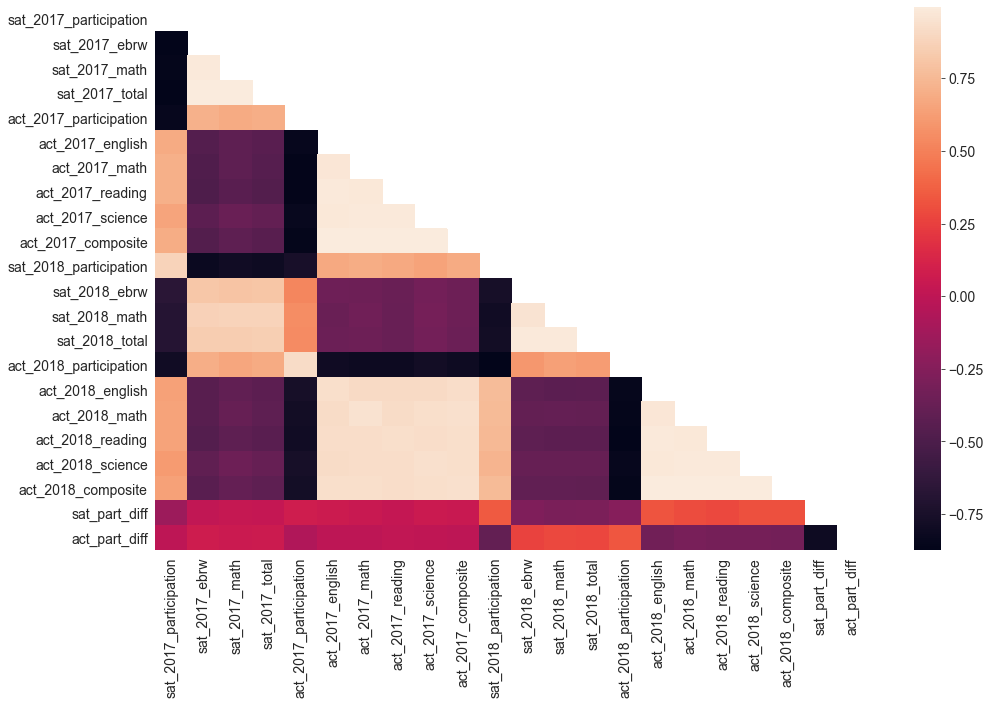

In [64]:
plt.figure(figsize=(16,10))
sns.heatmap(combined_df.corr(), mask=np.triu(np.ones_like(combined_df.corr())));

This heatmap has too many variables and it is seems that the subtest scores each test might have high correlation. Let's also plot a heatmap with only the participation and the total/combined values.

In [65]:
df = combined_df[['sat_2017_participation', 'sat_2017_total', 'act_2017_participation', 'act_2017_composite',
                 'sat_2018_participation', 'sat_2018_total', 'act_2018_participation', 'act_2018_composite']]

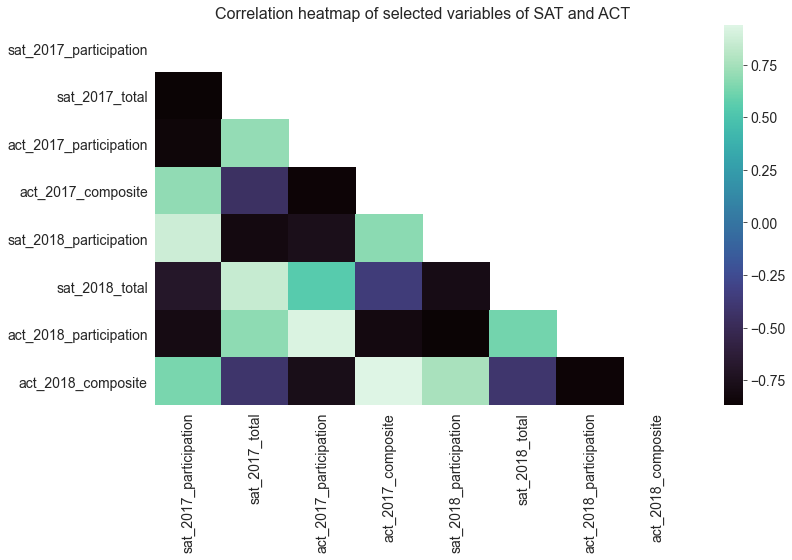

In [66]:
plt.figure(figsize=(12,7))
plt.title('Correlation heatmap of selected variables of SAT and ACT')
sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr())), cmap='mako');

Even though a few of the relationships are not intuitive, some conclusions can be drawn from this plot. It shows that there is a strong negeative correlation between SAT & ACT participations for both years.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/2.0.2/users/pyplot_tutorial.html)

Here's some starter code:

In [67]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, xlim=None, bins=10):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15), sharey=True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins=bins) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels)
        ax[i].set_ylabel(list_of_ylabels)
        ax[i].set_xlim(xlim)
        ax[i].yaxis.set_major_locator(MaxNLocator(integer=True))

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

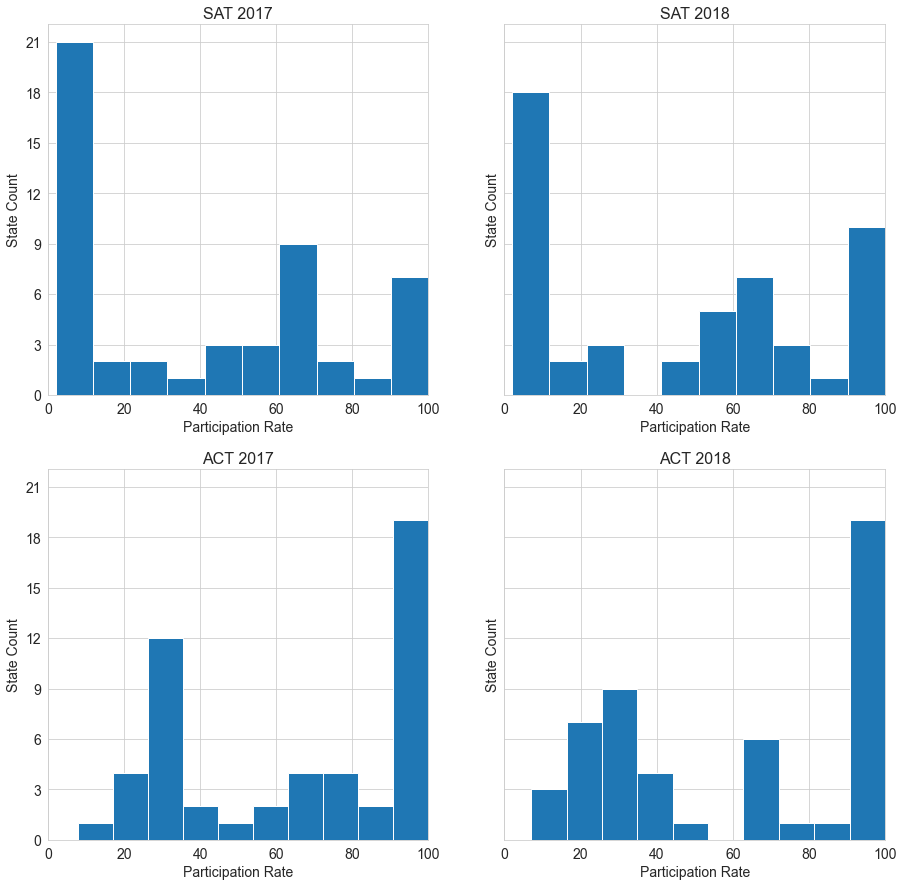

In [68]:
# Histogram subplots for SAT & ACT participation rates
subplot_histograms(combined_df,
                   ['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation'],
                   ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'],
                   'Participation Rate',
                   'State Count',
                   (0,100),
                   10)

SAT saw an increase in the maximum participation rate from 2017 to 2018, as was confirmed earlier when analysing the max and min values of these parameters. While ACT had same number of states participating at 100%, there were a few states that saw their participation decline in ACT 2018, as seen in the plot above.

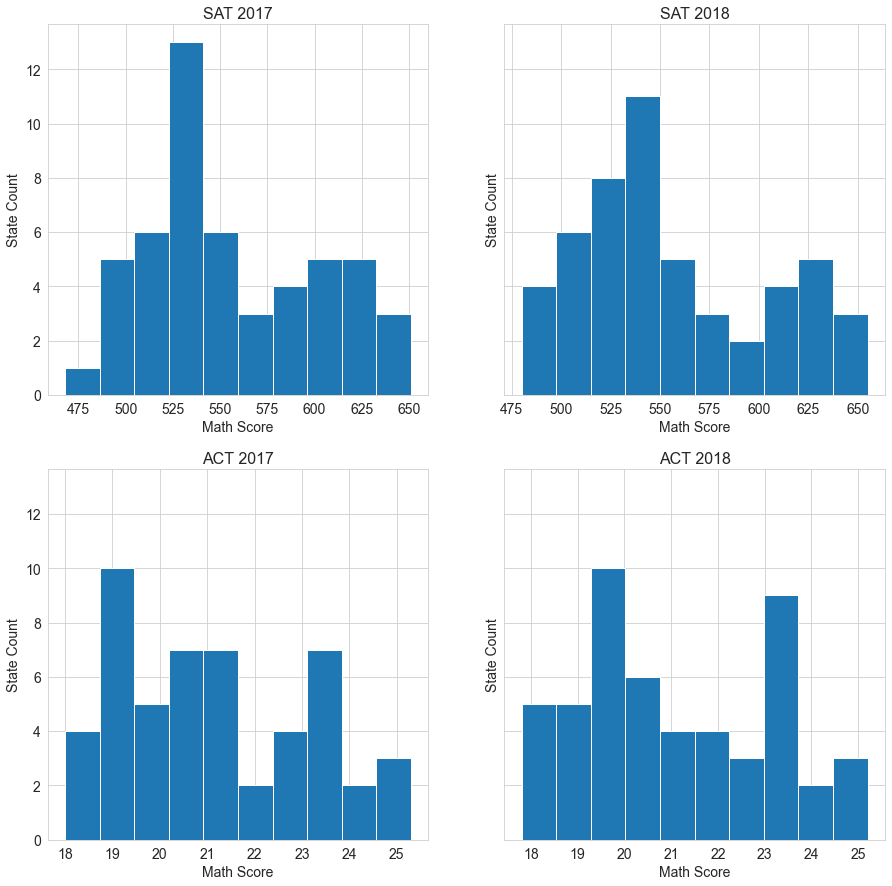

In [69]:
# Histogram subplots for SAT & ACT math scores
subplot_histograms(combined_df,
                   ['sat_2017_math', 'sat_2018_math', 'act_2017_math', 'act_2018_math'],
                   ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'],
                   'Math Score',
                   'State Count')

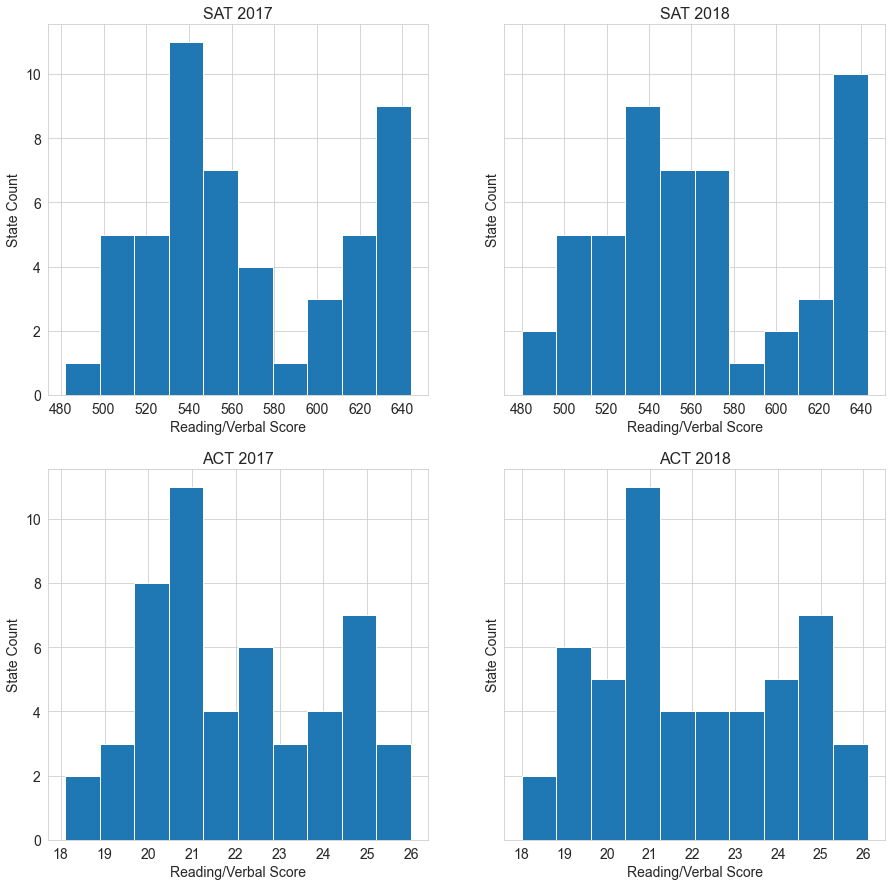

In [70]:
# Histogram subplots for SAT & ACT reading/verbal scores
subplot_histograms(combined_df,
                   ['sat_2017_ebrw', 'sat_2018_ebrw', 'act_2017_reading', 'act_2018_reading'],
                   ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'],
                   'Reading/Verbal Score', 'State Count')

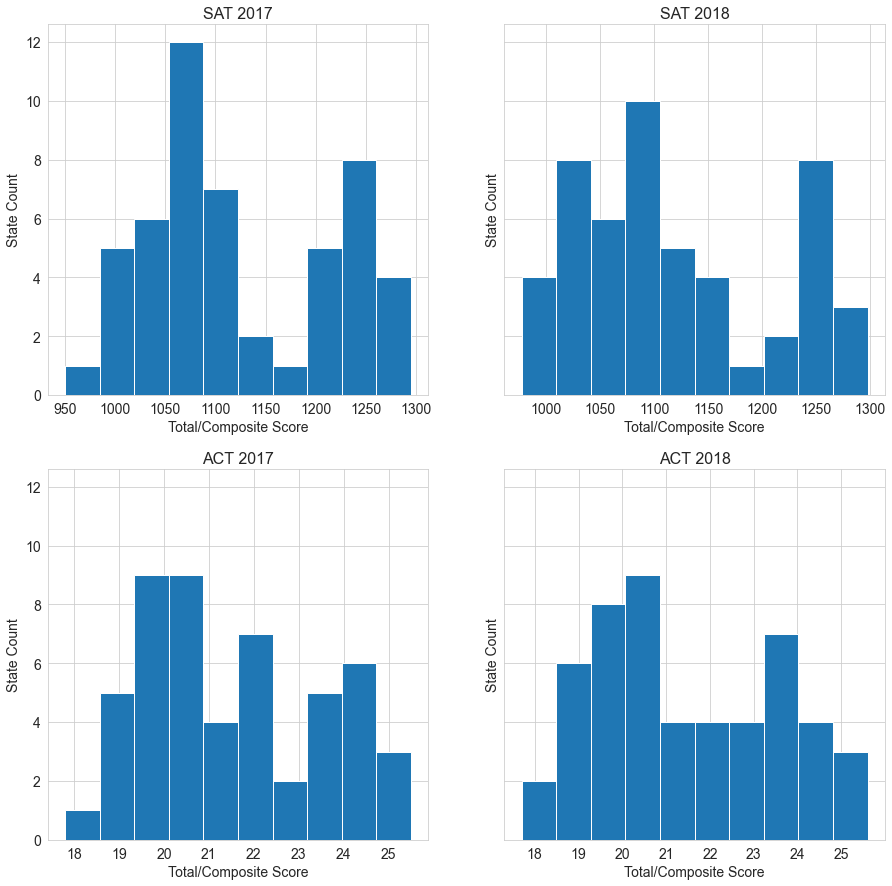

In [71]:
# Histogram subplots for SAT & ACT total/composite scores
subplot_histograms(combined_df,
                   ['sat_2017_total', 'sat_2018_total', 'act_2017_composite', 'act_2018_composite'],
                   ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'],
                   'Total/Composite Score', 'State Count')

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [72]:
def subplot_scatter(dataframe, list_of_xdata, list_of_ydata, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_xdata)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,7)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, _ in enumerate(list_of_xdata): # Gives us an index value to get into all our lists
        ax[i].scatter(x=dataframe[list_of_xdata[i]], y=dataframe[list_of_ydata[i]]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
#         ax[i].set_xlim(0,100)
        ax[i].grid(False)

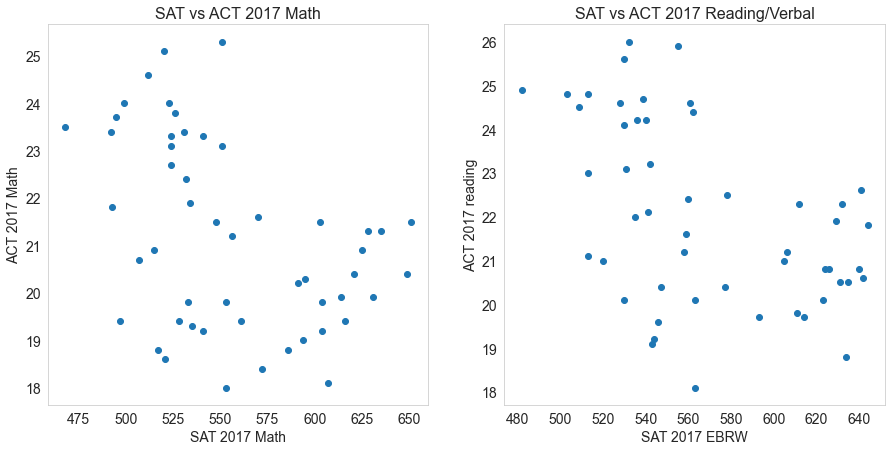

In [73]:
# Scatter subplots of SAT vs ACT math & verbal/reading scores for 2017
subplot_scatter(combined_df,
                ['sat_2017_math', 'sat_2017_ebrw'], ['act_2017_math', 'act_2017_reading'],
                ['SAT vs ACT 2017 Math', 'SAT vs ACT 2017 Reading/Verbal'],
                ['SAT 2017 Math', 'SAT 2017 EBRW'],
                ['ACT 2017 Math', 'ACT 2017 reading'])

This scatter plot does not necessarily give any insights between the Math & Reading/Verbal scores of SAT and ACT.

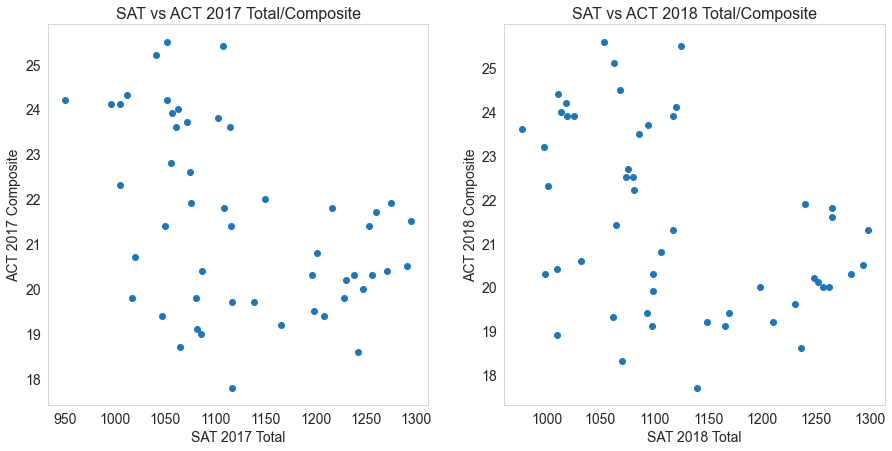

In [74]:
# Scatter subplots of SAT & ACT total & composite scores for 2017 & 2018
subplot_scatter(combined_df,
                ['sat_2017_total', 'sat_2018_total'], ['act_2017_composite', 'act_2018_composite'],
                ['SAT vs ACT 2017 Total/Composite', 'SAT vs ACT 2018 Total/Composite'],
                ['SAT 2017 Total', 'SAT 2018 Total'],
                ['ACT 2017 Composite', 'ACT 2018 Composite'])

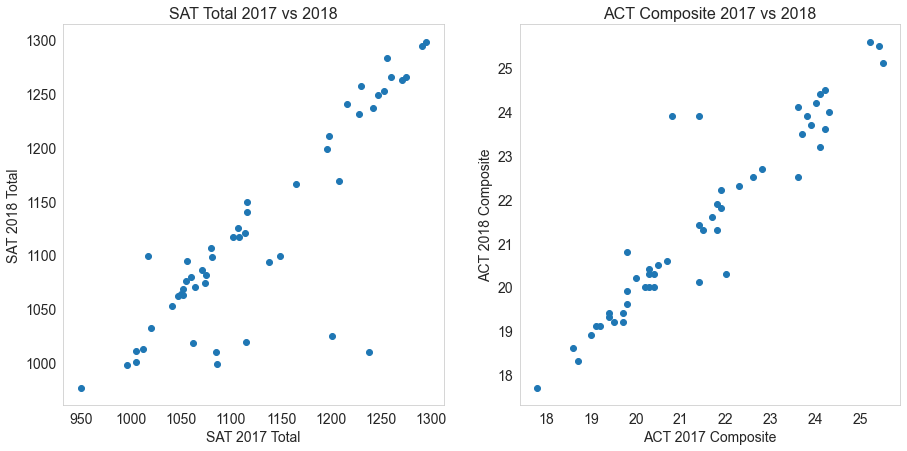

In [75]:
# Scatter subplots of SAT total & ACT composite scores for 2017 vs 2018
subplot_scatter(combined_df,
                ['sat_2017_total', 'act_2017_composite'], ['sat_2018_total', 'act_2018_composite'],
                ['SAT Total 2017 vs 2018', 'ACT Composite 2017 vs 2018'],
                ['SAT 2017 Total', 'ACT 2017 Composite'],
                ['SAT 2018 Total', 'ACT 2018 Composite'])

The positive correlation between 2017 and 2018 scores of the SAT & ACT is expected, barring any major change in the exam structure, because a high average score for a state in 2017 is a pretty good predictor of performance in 2018.

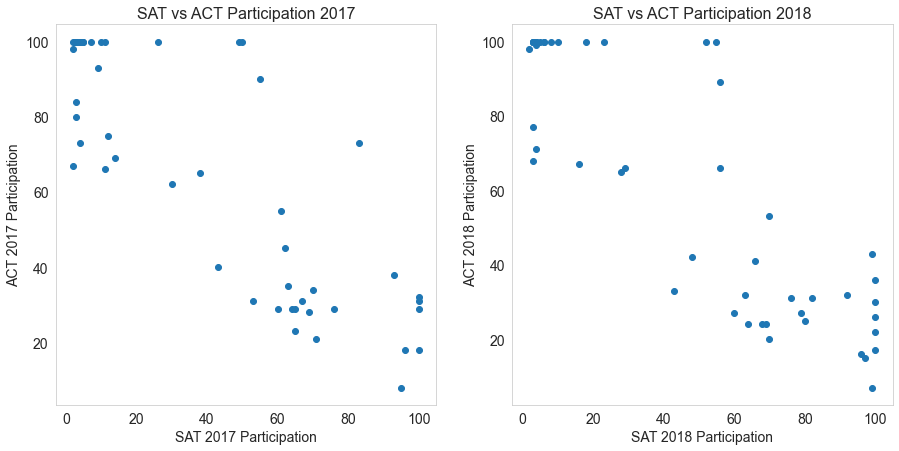

In [76]:
# Scatter subplots of SAT vs ACT Participation rates for 2017 & 2018
subplot_scatter(combined_df,
                ['sat_2017_participation', 'sat_2018_participation'], ['act_2017_participation', 'act_2018_participation'],
                ['SAT vs ACT Participation 2017', 'SAT vs ACT Participation 2018'],
                ['SAT 2017 Participation', 'SAT 2018 Participation'],
                ['ACT 2017 Participation', 'ACT 2018 Participation'])

It can be inferred from the plot above that the states prefer one test over the other. The increase in participation in one test results in a decrease in participation of the other test, and vice-versa, as both these features are negatively correlated.

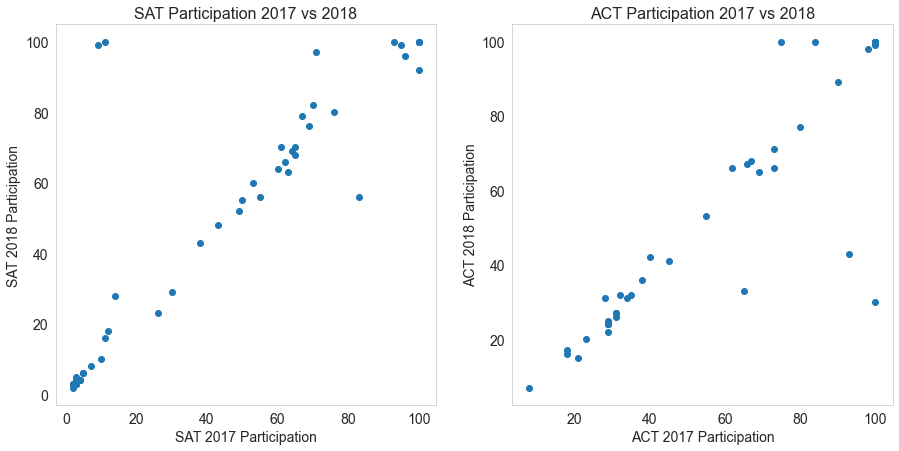

In [77]:
# Scatter subplots of SAT & ACT Participation rates for 2017 vs 2018
subplot_scatter(combined_df,
                ['sat_2017_participation', 'act_2017_participation'], ['sat_2018_participation', 'act_2018_participation'],
                ['SAT Participation 2017 vs 2018', 'ACT Participation 2017 vs 2018'],
                ['SAT 2017 Participation', 'ACT 2017 Participation'],
                ['SAT 2018 Participation', 'ACT 2018 Participation'])

The outliers here are points of interest, as they do not follow the expected trend to maintain similar levels of participation rates in the respective test.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

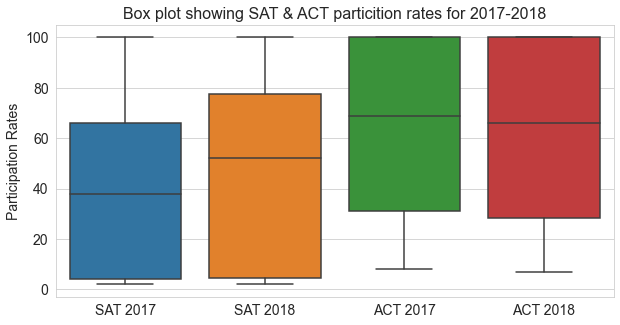

In [78]:
# SAT & ACT participation comparison 2017 vs 2018
plt.figure(figsize=(10,5))
sns.boxplot(data=combined_df[['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation']])
plt.xticks([0, 1, 2, 3], labels=['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'])
plt.ylabel('Participation Rates')
plt.title('Box plot showing SAT & ACT particition rates for 2017-2018');

Overall, the ACT has better participation rates in states compared to SAT. However, the median participation across all states increased for SAT from 2017 to 2018, while it decreased slightly for ACT, but still higher than SAT.

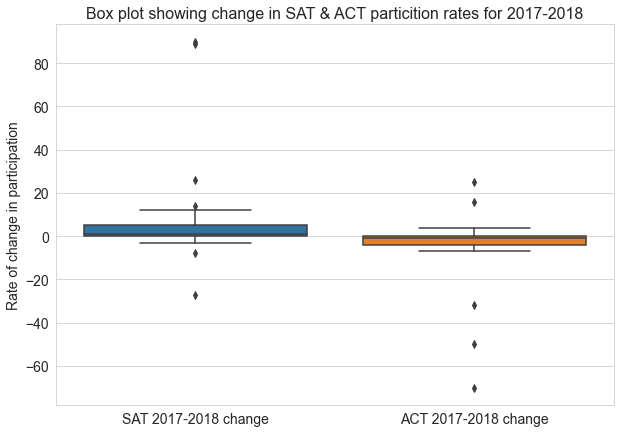

In [79]:
# SAT & ACT participation rate difference 2017 vs 2018
plt.figure(figsize=(10,7))
sns.boxplot(data=combined_df[['sat_part_diff', 'act_part_diff']])
plt.xticks([0, 1], labels=['SAT 2017-2018 change', 'ACT 2017-2018 change'])
plt.ylabel('Rate of change in participation')
plt.title('Box plot showing change in SAT & ACT particition rates for 2017-2018');

More states had lower ACT participation rates in 2018 compared to 2017, than the SAT. As we have shown multiple times, there were a couple of states which had dramatic changes in participation rates from 2017 to 2018.

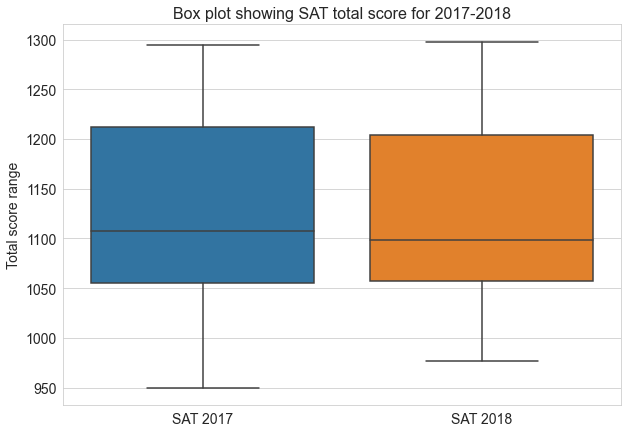

In [80]:
# SAT performance comparison 2017 vs 2018
plt.figure(figsize=(10,7))
sns.boxplot(data=combined_df[['sat_2017_total', 'sat_2018_total']]);
plt.xticks([0, 1], labels=['SAT 2017', 'SAT 2018'])
plt.ylabel('Total score range')
plt.title('Box plot showing SAT total score for 2017-2018');

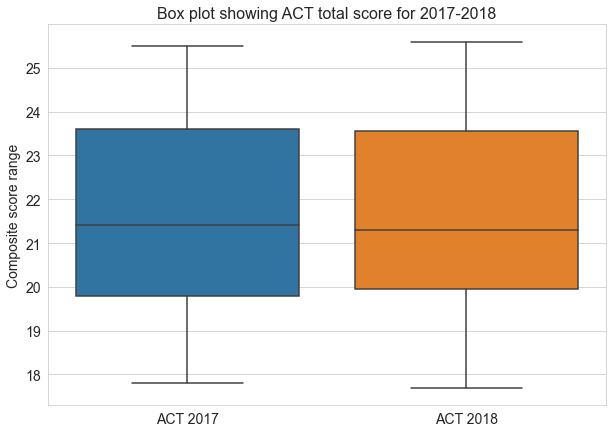

In [81]:
# ACT performance comparison 2017 vs 2018
plt.figure(figsize=(10,7))
sns.boxplot(data=combined_df[['act_2017_composite', 'act_2018_composite']]);
plt.xticks([0, 1], labels=['ACT 2017', 'ACT 2018'])
plt.ylabel('Composite score range')
plt.title('Box plot showing ACT total score for 2017-2018');

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

**Compare SAT/ACT participation vs Total/Composite score**

Some of the statistics in this project have revealed an interesting observation that the participation rate has a slight negative effect on the the States' SAT & ACT average Total/Composite scores. Let's examine with a few plots.

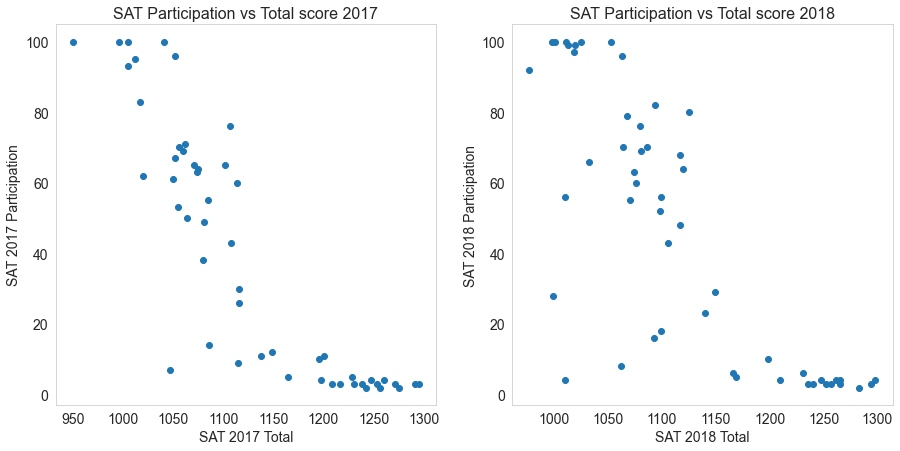

In [82]:
# Scatter subplots of SAT Participation rates vs Total score for 2017 vs 2018
subplot_scatter(combined_df,
                ['sat_2017_total', 'sat_2018_total'], ['sat_2017_participation', 'sat_2018_participation'],
                ['SAT Participation vs Total score 2017', 'SAT Participation vs Total score 2018'],
                ['SAT 2017 Total', 'SAT 2018 Total'],
                ['SAT 2017 Participation', 'SAT 2018 Participation'])

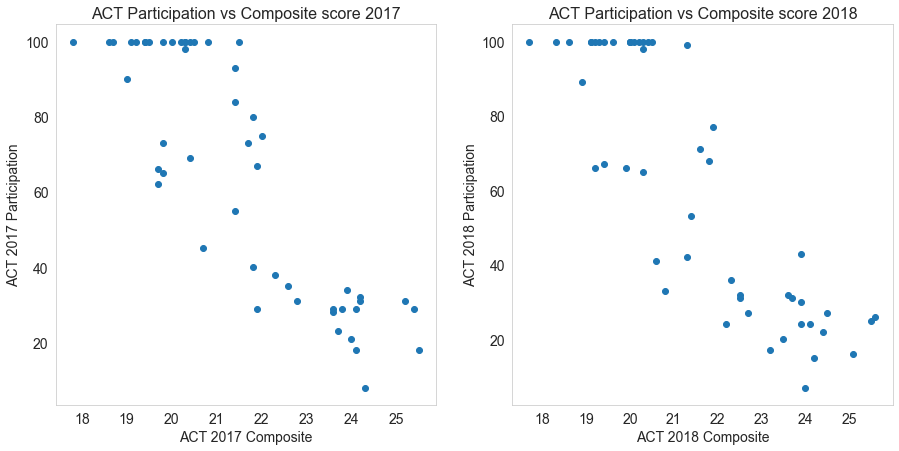

In [83]:
# Scatter subplots of ACT Participation rates vs Total score for 2017 vs 2018
subplot_scatter(combined_df,
                ['act_2017_composite', 'act_2018_composite'], ['act_2017_participation', 'act_2018_participation'],
                ['ACT Participation vs Composite score 2017', 'ACT Participation vs Composite score 2018'],
                ['ACT 2017 Composite', 'ACT 2018 Composite'],
                ['ACT 2017 Participation', 'ACT 2018 Participation'])

The above four plots outline one of the inferences which has been commonly seen across various states' data. It is that with the increase in participation rates of the tests, the average final score reduces, and vice-versa. In statistics, this is logical to summarize any population growth with reduction in the variable mean.

#### Direct score comparison between SAT & ACT according to the [concordance table](https://collegereadiness.collegeboard.org/pdf/guide-2018-act-sat-concordance.pdf).

In 2016, and later in 2018, the College Board released a set of _concordance tables_ that converted subtest and final scores from SAT to ACT and vice-versa. This increases the transparency and helps students make decision for selecting their universities and colleges for studies. To make a direct comparison of the total score of SAT with composite scores of ACT, convert the SAT scores below and plot them later.

In [84]:
# Function to convert SAT total scores to comparable ACT composite score
def convert_sat_act_score(score):
    # concordance table from reference shared above
    concordance_table ={
        1570: 36, 1530: 35, 1490: 34, 1450: 33, 1420: 32, 1390: 31, 1360: 30, 1330: 29, 1300: 28,
        1260: 27, 1230: 26, 1200: 25, 1160: 24, 1130: 23, 1100: 22, 1060: 21, 1030: 20, 990: 19,
        960: 18, 920: 17, 880: 16, 830: 15, 780: 14, 730: 13, 690: 12, 650: 11, 620: 10
    }
    
    for sat_score, act_score in concordance_table.items():
        if score > sat_score:
            return act_score

In [85]:
# Convert the SAT total scores to the ACT scale based on the concordance table from reference for comparison
combined_df['sat_scaled_2017'] = combined_df['sat_2017_total'].apply(convert_sat_act_score)
combined_df['sat_scaled_2018'] = combined_df['sat_2018_total'].apply(convert_sat_act_score)

In [86]:
combined_df[['sat_scaled_2017', 'sat_scaled_2018', 'act_2017_composite', 'act_2018_composite']].head()

,sat_scaled_2017,sat_scaled_2018,act_2017_composite,act_2018_composite
0,24,24,19.2,19.1
1,21,22,19.8,20.8
2,22,23,19.7,19.2
3,25,24,19.4,19.4
4,20,21,22.8,22.7


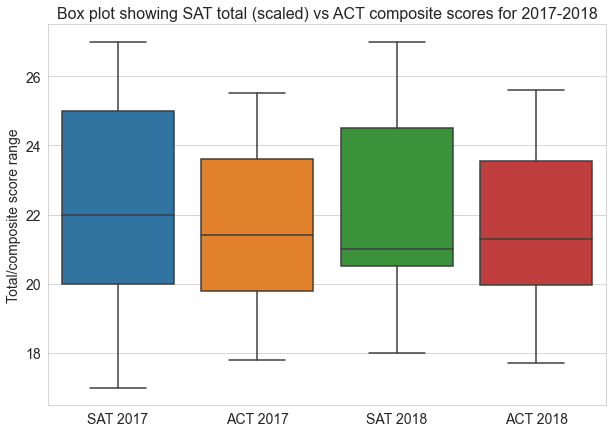

In [87]:
# SAT (scaled) & ACT performance comparison 2017 vs 2018
plt.figure(figsize=(10,7))
sns.boxplot(data=combined_df[['sat_scaled_2017', 'act_2017_composite', 'sat_scaled_2018', 'act_2018_composite']]);
plt.xticks([0, 1, 2, 3], labels=['SAT 2017', 'ACT 2017', 'SAT 2018', 'ACT 2018'])
plt.ylabel('Total/composite score range')
plt.title('Box plot showing SAT total (scaled) vs ACT composite scores for 2017-2018');

The average ACT Composite score remained (mostly) unchanged from 2017 to 2018, but its counterpart, the scaled Total score of SAT saw a drop in average during the same period. One possible explanation could be that the SAT had more number of students taking the test in 2018 than 2017, and thus it is only logical that the average and hence the median goes down unless all new students perform above-average.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

![](./../images/SAT-ACT-choropleth.png "Choropleth Map- SAT & ACT 2017-2018 Participation Trend")


A choropleth map above showing the participation rate comparison between SAT & ACT from 2017-2018. There is a clear contrast in the image and it can be inferred that the states prefer one test over the other.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [88]:
# use the aggregate method to calculate the descriptive statistics of the variables
combined_df.iloc[:,1:-4].agg(['min', 'max', 'mean', 'median', 'skew']).T

,min,max,mean,median,skew
sat_2017_participation,2.0,100.0,39.803922,38.0,0.346450
sat_2017_ebrw,482.0,644.0,569.117647,559.0,0.272693
sat_2017_math,468.0,651.0,556.882353,548.0,0.365040
sat_2017_total,950.0,1295.0,1126.098039,1107.0,0.310903
act_2017_participation,8.0,100.0,65.254902,69.0,-0.197989
act_2017_english,16.3,25.5,20.931373,20.7,0.352660
act_2017_math,18.0,25.3,21.182353,20.9,0.332683
act_2017_reading,18.1,26.0,22.013725,21.8,0.269366
act_2017_science,18.2,24.9,21.450980,21.3,0.218823
act_2017_composite,17.8,25.5,21.519608,21.4,0.319810


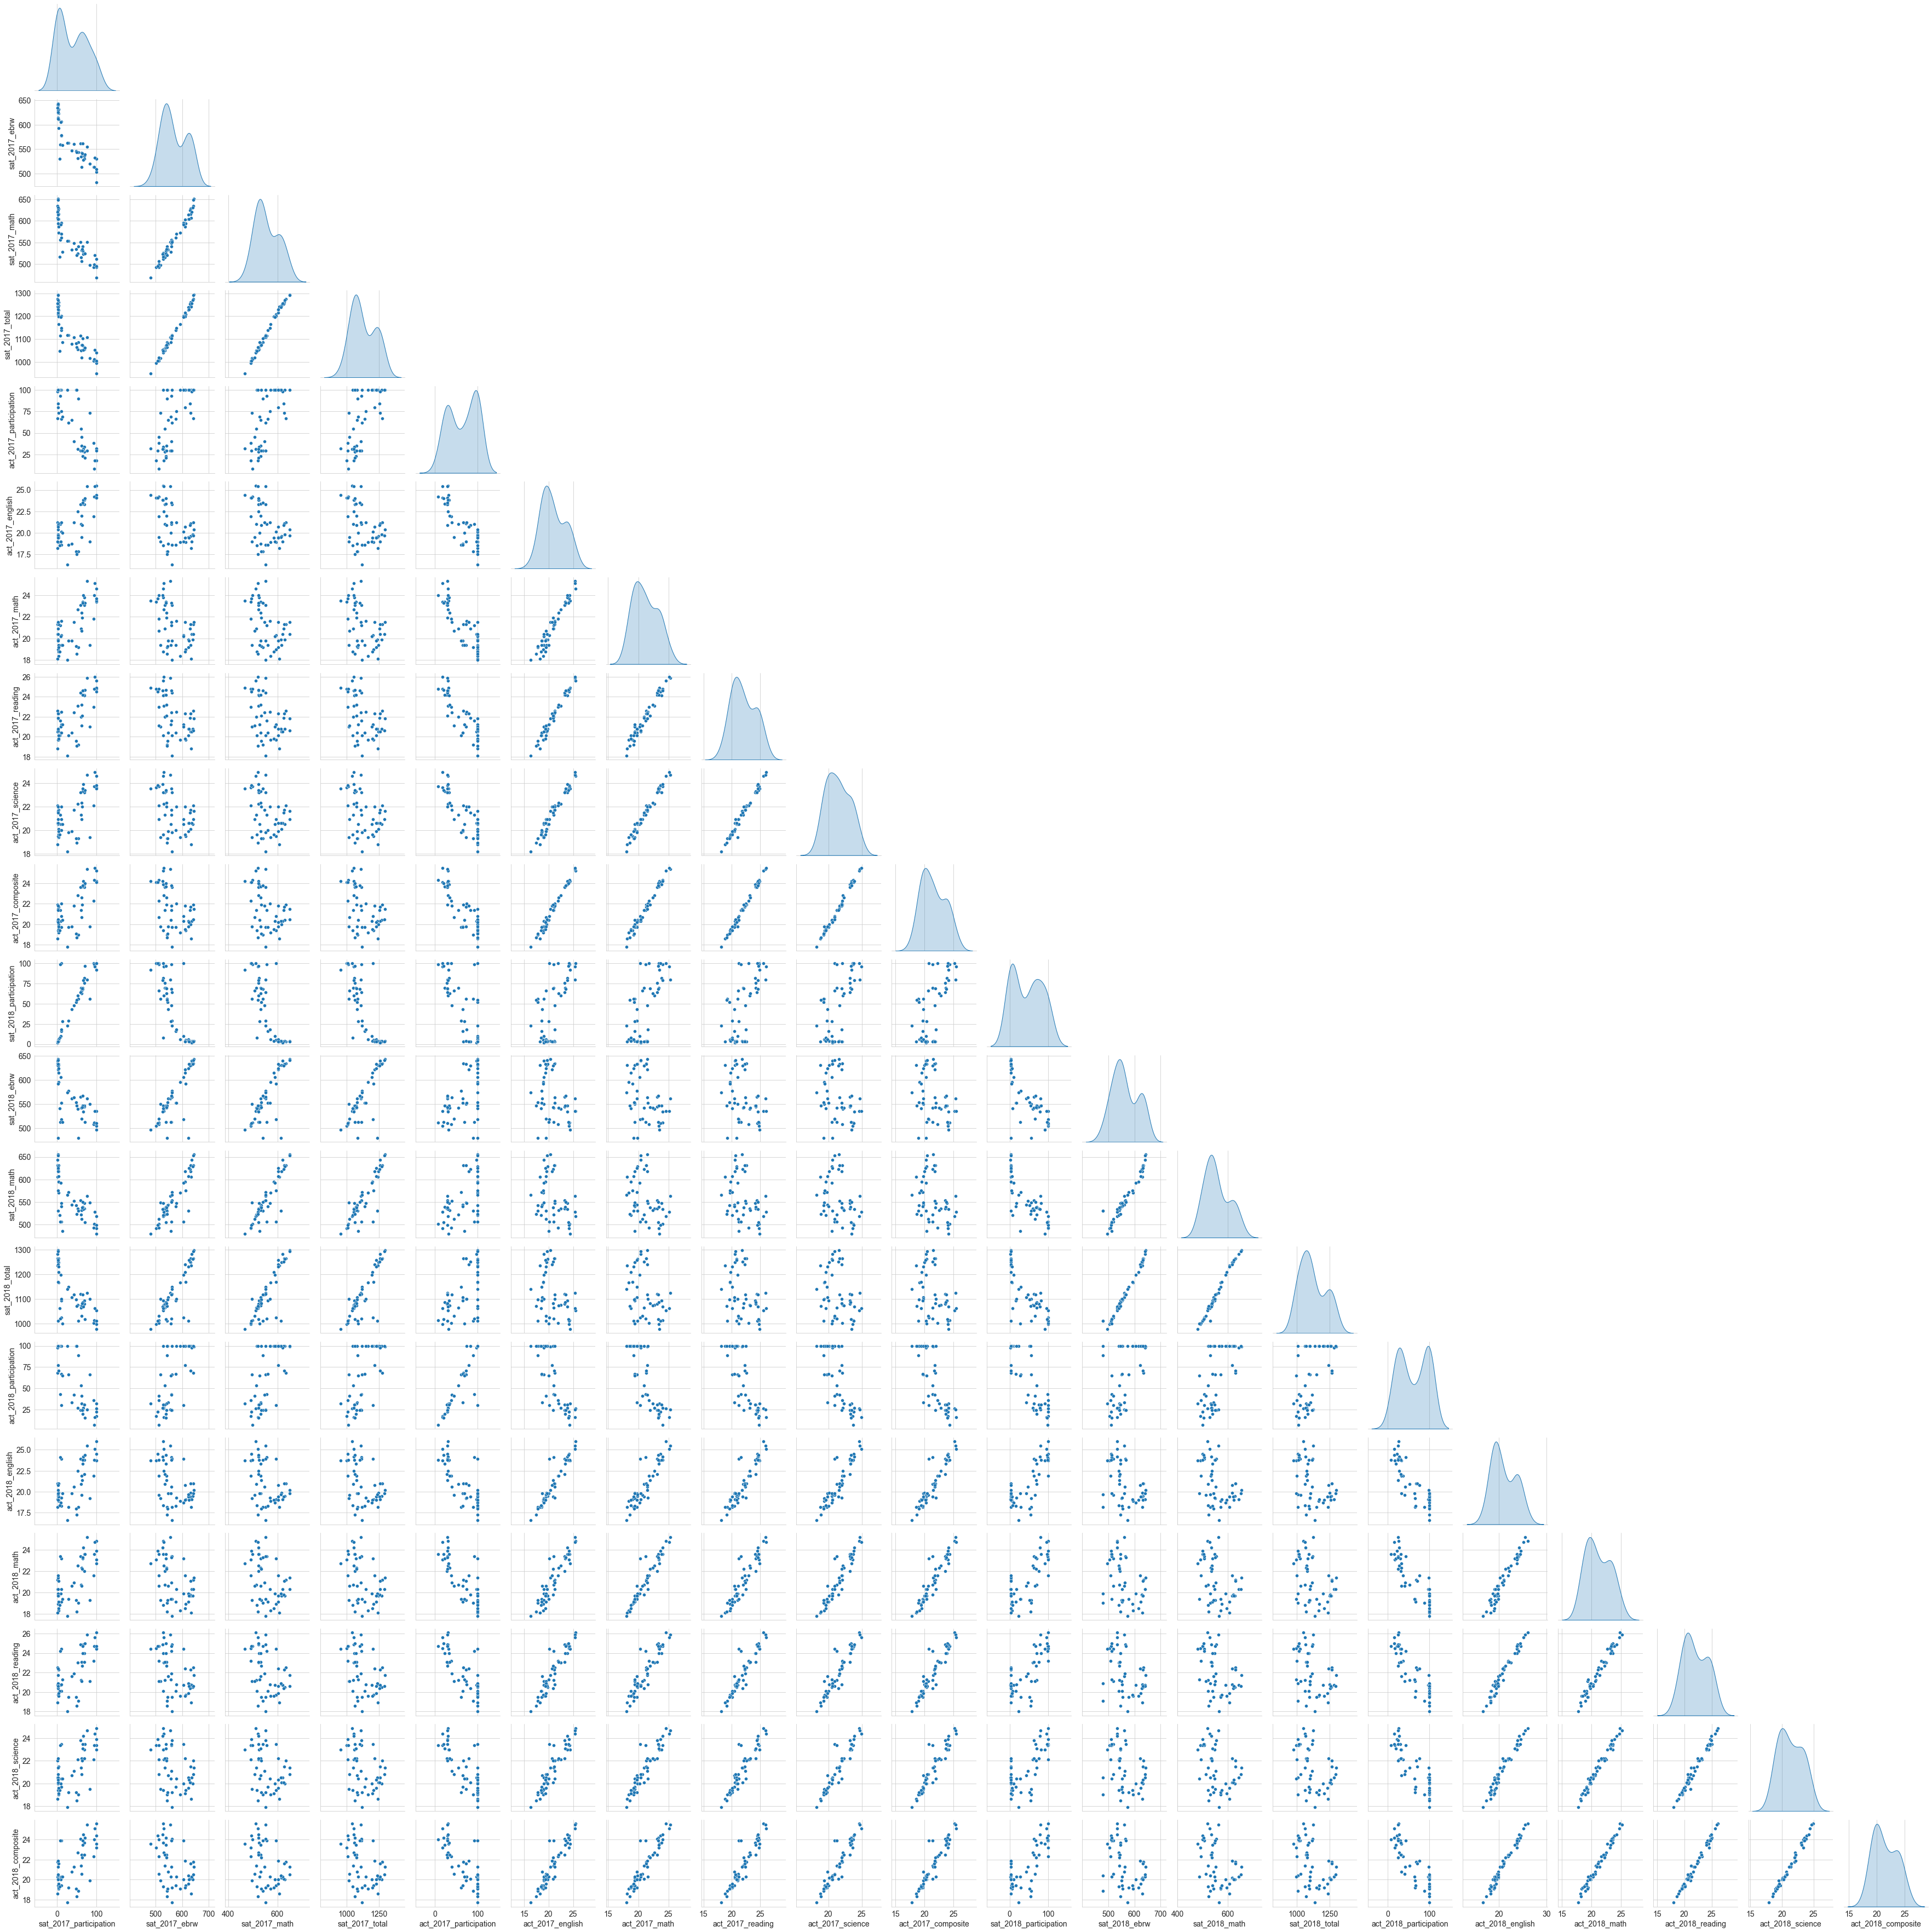

In [89]:
# Seaborn pairplot to quickly see the diagonal showing the density distribution of each variable from dataset
sns.pairplot(combined_df.iloc[:,1:-4], corner=True, diag_kind='kde');

Answers: The following conclusions can be drawn from the table and the plots above:
- All the variables from the combined dataset of SAT & ACT from the years 2017-2018 have **bimodal distribution**, some more skewed than others.
- The mean & median values are generally in the similar range and thus the central tendency can be said to have **imperfect symmetry**.
- All variables, but the ACT participation rates for both years in consideration, have **positive skew**, meaning more values lie to the left of the mean in distribution.

#### We generally assume that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: Not necessarily. This data is not normally distributed as described above. The sampling distribution will have a normal distribution, based on the Central Limit Theorem, however, this data is the state-wide mean value of the variables.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: Indeed it does not hold true for the Math, Reading and Participation Rates, and without the Central Limit Theorem not much can be said about the population. This data does help us to draw conclusions but the true parameter cannot be predicted with great confidence.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describe in answering this question)*

Answer: 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: The original data is in different range and thus cannot be compared. To perform any meaningful comparison between the Math scores of SAT and ACT, a standardized uniform sample distribution has to be drawn from the population, i.e., _mean_ is 0 and _std_ is 1. Then yes, a comparison can be made.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

### States of Interest
Based on the EDA performed along with the plots, the following states are selected for further analysis

#### Illinois
The state of _Illinois_ had a rapid change in participation rates for SAT from 2017 to 2018 as we saw in the plots earlier and pointed out the difference. A [report](https://chicago.chalkbeat.org/2018/7/27/21105418/illinois-has-embraced-the-sat-and-the-act-is-mad-about-it) clearly shows the reasons for that change, which are enlisted below-
- The state of _Illinois_ awarded College Board, the organization that conducts SAT, a multi-year deal to make SAT available to it's students for free.
- Additionally, it also had a deal to conduct PSAT, Pre-SAT, for 9th and 10th grade students. This is crucial because as the students become familiar with one test format, it is highly likely they will choose the same test when it comes to decide between SAT and ACT.
- The state is providing the SAT not only as a college entrance exam, but also as a measure of school achievement.

On the other hand, to no surprise, ACT saw a significant decline in their participation in the state in 2018. However, it was still more than the expected drop, as stated in this [Chicago Tirbune article](https://www.chicagotribune.com/news/breaking/ct-met-illinois-act-test-scores-20181016-story.html). About 43% of the students still chose to give ACT even though the SAT was given for free. This steep dive in participation had a dramatic effect on the composite score, in that it was one of the highest average the state had seen in over 2 decades. This is intuitive, as the opposite holds true as well, as when the participation goes down, the average goes up.

#### Colorado
_Colorado_ was the other state that saw the rise in participation in SAT in 2018. This is in sync with the fact that the state partnered with College Board to make SAT the state's accoutability exam for each student, as stated [here](https://www.testive.com/colorado-sat-change-2017/).

#### Florida
Traditionally, a ACT-preferring state for quite few years, just like rest of the nation's states, _Florida_ was one of the few states that had more than 50% participation in both SAT & ACT in 2017-2018. Although, the SAT gained popularity in the state due to a multitude of reasons (as [reported here](https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html)) including-
- The increased popularity of the SAT in the state is attributed to "school days", as one official says. This has many implications to help students take SAT like, the test fee is waived, the test happens on a school day rather than a Saturday (as it used to happen before), so the parents don't have to worry about sending their child to the school another day.
- The College Board also partnered with Khan Academy, to provide free online lessons and practice problems for SAT.

As it is mandated that students take either of the two tests for admissions into any Florida University, the ACT is also a preferred choice for many students.

**Note:** Many students' choice of one test over the other is thought to be influenced by the college/university they select, but rather its the state they give the test which prefers one over the other, as is shown next.

### Uncanny Resemblance

From the Tableau choropleth, one cannot help but notice a familiar pattern across the US map. The SAT-ACT preference resembles the state-wise political alignemnt. Found an [infographic on SAT _vs_ ACT](https://www.collegeraptor.com/getting-in/articles/act-sat/preference-act-sat-state-infographic/) preference across states and compared it to the [US 2016 Election Results](https://time.com/4561625/electoral-college-predictions/). Largely speaking, the Democratic states have preference for SAT and the Republican states prefer ACT. Though, this cannot be assertively said, as not much proof in direct relation to this was found during research, but decided to leave the images open to interpretation.

SAT _vs_ ACT             |  US 2016 Election Poll
:-------------------------:|:-------------------------:
![](./../images/sat-act-infographic.jpg)  |  ![](./../images/us-2016-election.jpg)

## Conclusions and Recommendations

Based on your exploration of the data, what are your key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

After analysing, plotting, analysing again and finding some studies on the topic, it can be concluded that the nation-wide trends and states' own policies and preferences are a good predictor of the participation rates for the SAT and ACT tests. Recently, many universities and colleges across the country have opted to remove the standadization tests, both SAT & ACT, from their admission requirements but that has not stopped students from taking either or even both tests.

Many have postulated that the SAT & ACT scores are a good predictor of the students' GPA in the freshmen year ([source](https://www.forbes.com/sites/evangerstmann/2020/05/23/dropping-the-sat-and-act-is-about-politics-not-diversity/?sh=3086520c2948)). Alternatively, it has also been pointed out that having this tests as requirements is a hurdle for many low-income households, or people from minorities, or first-gen immigrants. Universities, by removing these requirements, are eliminating barriers to such candidates and open their doors to a wider diversity & talent. The argument, on the contrary, as stated in this [report](https://senate.universityofcalifornia.edu/_files/underreview/sttf-report.pdf), is that the standardization test scores promote minority students and gives them a path to succeed at good schools.

The College Board has taken some steps to improve the SAT participation rates in the United States, which have proven quite helpful in getting the rates up in some states. Take Based on the analysis conducted above, it can be recommended to increase the collaborations with schools to organize the "school days", which are the days on which the SAT is conducted on-campus, is free of charge, and the school conducts them. Moreover, the deals with individual states helps to incentivise promotion of SAT, as then the public schools don't have to spend extra budget on having to give the SAT for free to its students. These deals can also include helping schools take PSAT, as in _Illinois_, for 9th and 10th grade students so they become comfortable with the format. The College Board can also partner with schools and other tutoring centres to provide low-cost or free SAT preparation material to boost students' support and confidence in the test.

Take _North Dakota_, for instance, the state has mandated ACT as its prefered test for seniors and has a state-wide test for the juniors. In 2018, the state was granted one-of-a-kind permission to- "_to use a new kind of testing flexibility in federal law: the right to let school districts substitute the ACT for the state’s own required high school assessment._" ([source](https://www.edweek.org/policy-politics/north-dakota-is-first-state-to-let-districts-use-act-instead-of-state-exam/2018/03)). The state wants to follow the national trend of conducting fewer types of tests so students can focus more in class. In order to facilitate the state to switch to SAT, the College Board can work with the state authorities to do a technical review, a federal requirement to choose one of the national tests. Along with the recommendations above, this can really help the College Board get higher participation for SAT in the state.

Some other conclusions and inferences from the plots and analysis above can be summarized below as-
- Increase in participation rates in a state will result in decrease in the final score of the test, showing a negative correlation.
- Most of the states have a preference for one of the tests, and it has an uncanny resemblence to the politcal alignment on the map of United States.
- All the variables in this study had bimodal distribution.
- ACT is preferred more than SAT in many states but SAT is slowly getting more popular.
- There were four states in 2017 that had more than 50% participation in both SAT & ACT, and five states in 2018.

Lastly, a deeper study into the reason behind why states choose SAT over ACT, or otherwise, and why universties are opting to remove them from their admission requirements can be done.